In [30]:
# Import libraries
import numpy as np
import cv2 as cv
import matplotlib as mpl
import matplotlib.pyplot as plt
# Read image
src_image = cv.imread("Einstein.jpg")
# Convert to grayscale
src_image_gray = cv.cvtColor(src_image, cv.COLOR_BGR2GRAY)
# Resize color and grayscale image to (row / 4, col / 4) to visualize easier
row = src_image.shape[0]
row /= 4
row = int(row)
col = src_image.shape[1]
col /= 4
col = int(col)
src_image = cv.resize(src_image, (row, col))
src_image_gray = cv.resize(src_image_gray, (row, col))

# Convert image to 32 bit floating point for easier visualization
src_image_gray_2 = src_image_gray.astype(np.float32)


In [31]:
# Cell to apply forward difference
# Includes both x and y directions

def apply_forward_diff_x(image):
    padded_image = np.pad(image, ((0, 0), (0, 1))) # We pad the last column
    result = np.zeros(src_image_gray.shape)
    for j in range(image.shape[1]):
        result[ : , j] = padded_image[ : , j] - padded_image[ :, j + 1]
    return result
def apply_forward_diff_y(image):
    padded_image = np.pad(image, ((0, 1), (0, 0))) # We pad the last row
    result = np.zeros(src_image_gray.shape)
    for i in range(image.shape[0]):
        result[i , : ] = padded_image[ i , : ] - padded_image[ i + 1 , : ]
    return result
def apply_forward_diff(image):
    x_diff = apply_forward_diff_x(image)
    y_diff = apply_forward_diff_y(image)
    return x_diff, y_diff

In [32]:
# Cell to apply backward difference
# Includes both x and y directions

def apply_backward_diff_x(image):
    padded_image = np.pad(image, ((0, 0), (1, 0))) # We pad the first column
    result = np.zeros(src_image_gray.shape)
    for j in range(1, padded_image.shape[1]):
            result[: ,j - 1] = padded_image[ : , j] - padded_image[ : , j - 1]
    return result
def apply_backward_diff_y(image):
    padded_image = np.pad(image, ((1, 0), (0, 0))) # We pad the first row
    result = np.zeros(src_image_gray.shape)
    for i in range(1, padded_image.shape[0]):
        result[i - 1, : ] = padded_image[i, : ] - padded_image[i - 1, :]
    return result
def apply_backward_diff(image):
    x_diff = apply_backward_diff_x(image)
    y_diff = apply_backward_diff_y(image)
    return x_diff, y_diff


In [33]:
# Cell to apply central difference
# Includes both x and y directions

def apply_central_diff_x(image):
    padded_image = np.pad(image, ((0, 0), (1, 1))) # We pad first and last columns
    result = np.zeros(src_image_gray.shape)
    for j in range(1, padded_image.shape[1] - 1):
        result[ : , j - 1] = padded_image[ : , j + 1] - padded_image[ : , j - 1]
    return result
def apply_central_diff_y(image):
    padded_image = np.pad(image, ((1, 1), (0, 0))) # We pad the first and last rows
    result = np.zeros(src_image_gray.shape)
    for i in range(1, padded_image.shape[0] - 1):
        result[i - 1, :] = padded_image[i + 1, :] - padded_image[i - 1, :]
    return result
def apply_central_diff(image):
    x_diff = apply_central_diff_x(image)
    y_diff = apply_central_diff_y(image)
    return x_diff, y_diff


In [34]:
# Cell to compute magnitude and orientation given gradients in X and Y direction

def calc_magnitude(x_image, y_image):
    mag = np.zeros(x_image.shape)
    for i in range(x_image.shape[0]):
        for j in range(x_image.shape[1]):
            x_pixel = x_image[i][j]
            y_pixel = y_image[i][j]
            mag[i, j] = np.sqrt(x_pixel ** 2 + y_pixel ** 2)
    return mag

def calc_orientation(x_image, y_image):
    orient = np.zeros(x_image.shape)
    for i in range(x_image.shape[0]):
        for j in range(x_image.shape[1]):
            x_pixel = x_image[i][j]
            y_pixel = y_image[i][j]
            orient[i, j] = np.arctan2(y_pixel, x_pixel) * (180 / np.pi) % 180
    return orient


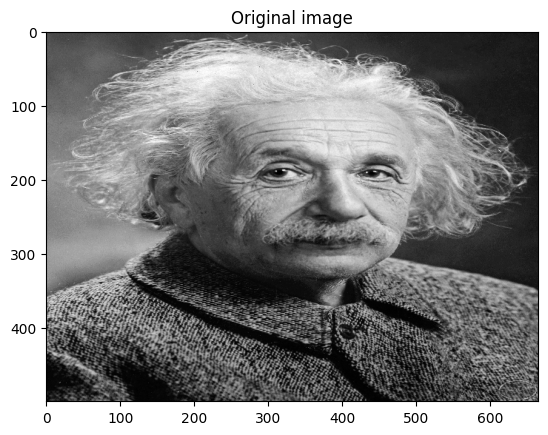

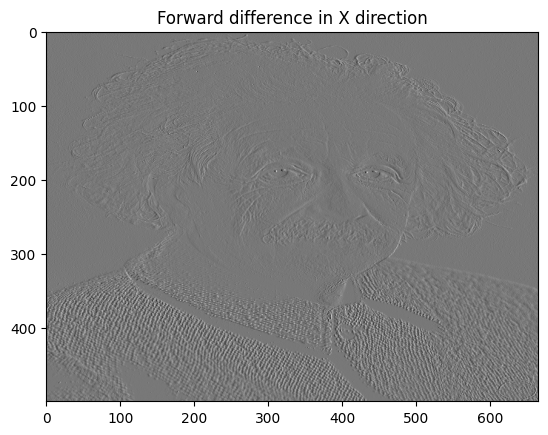

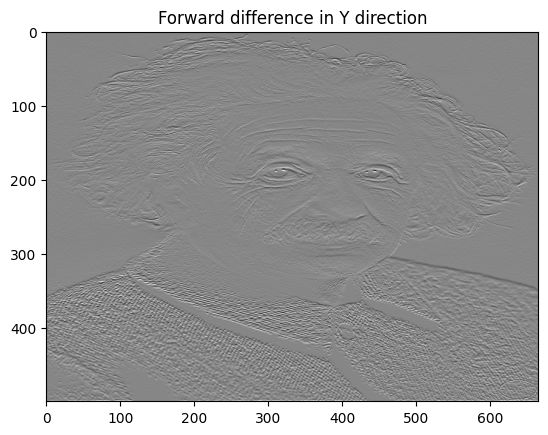

In [35]:
# Cell to apply forward difference

forw_diff_x, forw_diff_y = apply_forward_diff(src_image_gray_2)

plt.imshow(src_image_gray, cmap = 'gray')
plt.title("Original image")
plt.show()

plt.imshow(forw_diff_x, cmap = 'gray')
plt.title("Forward difference in X direction")
plt.show()

plt.imshow(forw_diff_y, cmap = 'gray')
plt.title("Forward difference in Y direction")
plt.show()

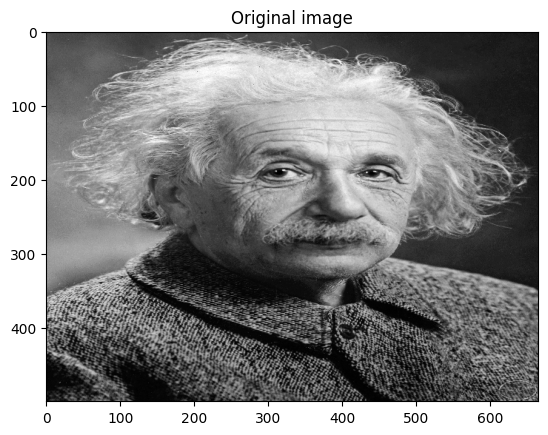

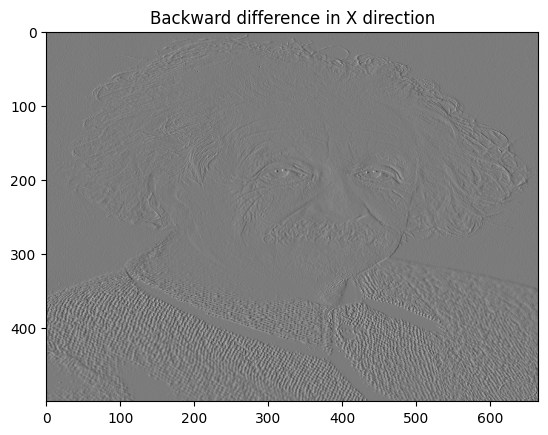

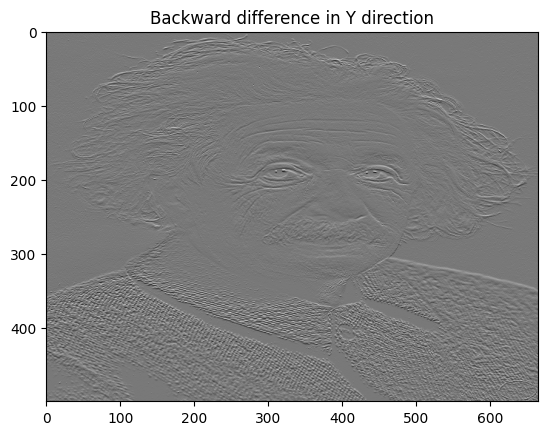

In [36]:

# Cell to apply backward difference

back_diff_x, back_diff_y = apply_backward_diff(src_image_gray_2)

plt.imshow(src_image_gray, cmap = 'gray')
plt.title("Original image")
plt.show()

plt.imshow(back_diff_x, cmap = 'gray')
plt.title("Backward difference in X direction")
plt.show()

plt.imshow(back_diff_y, cmap = 'gray')
plt.title("Backward difference in Y direction")
plt.show()

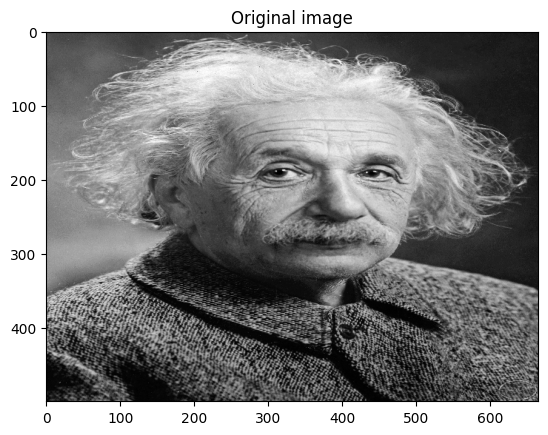

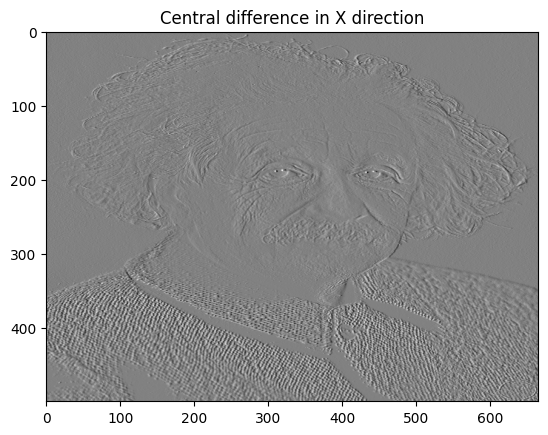

In [37]:
# Cell to apply central difference
centr_diff_x, centr_diff_y = apply_central_diff(src_image_gray_2)

plt.imshow(src_image_gray, cmap = 'gray')
plt.title("Original image")
plt.show()

plt.imshow(centr_diff_x, cmap = 'gray')
plt.title("Central difference in X direction")
plt.show()

plt.imshow(centr_diff_y, cmap = 'gray')
plt.title("Central difference in Y direction")
plt.show()

In [38]:
# Cell to calculate orientation and magnitude of each gradient

orient_forw = calc_orientation(forw_diff_x, forw_diff_y)
mag_forw = calc_magnitude(forw_diff_x, forw_diff_y)

orient_back = calc_orientation(back_diff_x, back_diff_y)
mag_back = calc_magnitude(back_diff_x, back_diff_y)

orient_centr = calc_orientation(centr_diff_x, centr_diff_y)
mag_centr = calc_magnitude(centr_diff_x, centr_diff_y)


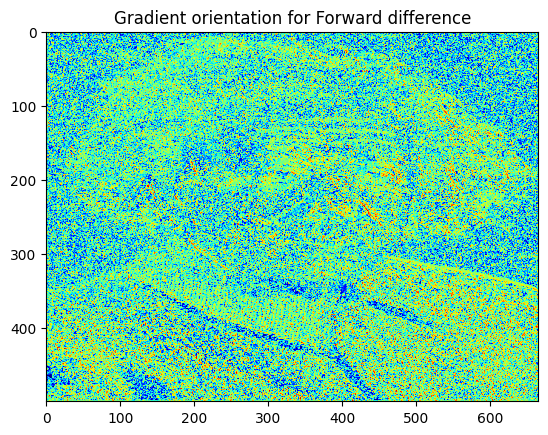

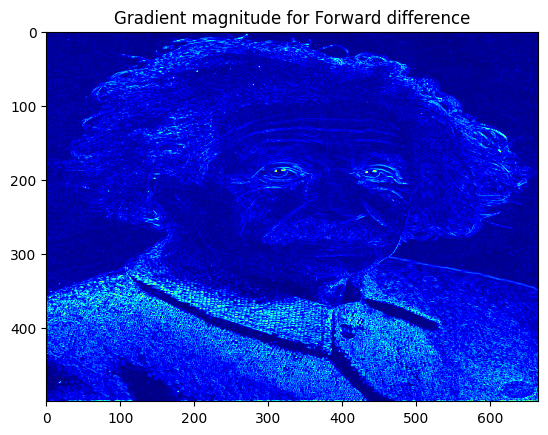

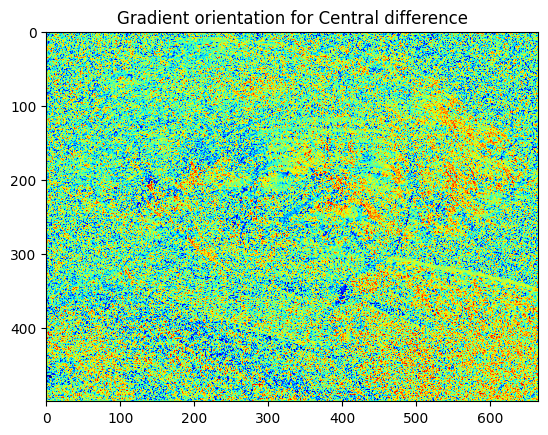

In [39]:
# Cell to plot magnitude and orientation for each difference
# We plot using the jet colormap to visualize the difference in values within the same image
# and between the gradient and orientation
plt.imshow(orient_forw, cmap = 'jet')
plt.title("Gradient orientation for Forward difference")
plt.show()

plt.imshow(mag_forw, cmap = 'jet')
plt.title("Gradient magnitude for Forward difference")
plt.show()

plt.imshow(orient_back, cmap = 'jet')
plt.title("Gradient orientation for Backward difference")
plt.show()

plt.imshow(mag_back, cmap = 'jet')
plt.title("Gradient magnitude for Backward difference")
plt.show()

plt.imshow(orient_centr, cmap = 'jet')
plt.title("Gradient orientation for Central difference")
plt.show()

plt.imshow(mag_centr, cmap = 'jet')
plt.title("Gradient magnitude for Central difference")
plt.show()

In [40]:
# Cell to compute 5 * 5 gaussian kernel
gaussian = np.zeros((5, 5))
sigma = 1
for i in range (5):
    for j in range(5):
        x = i - 2
        y = j - 2
        gaussian[i, j] = np.exp((-(x ** 2 + y ** 2) / (2 * sigma ** 2)))
# Normalizing the filter
gaussian /= np.sum(gaussian)

In [41]:
# Cell to apply gaussian kernel
def apply_gaussian(image, kernel):
    padded_image = np.pad(image, ((2, 2), (2, 2)), 'constant')
    result = np.zeros((padded_image.shape[0], padded_image.shape[1]))
    for i in range(2, image.shape[0] + 2):
        for j in range(2, image.shape[1] + 2):
            result[i, j] = (kernel[0][0] * padded_image[i - 2, j - 2] + kernel[0][1] * padded_image[i - 2, j - 1] + kernel[0][2] * padded_image[i - 2, j] + kernel[0][3] * padded_image[i - 2, j + 1] + kernel[0][4] * padded_image[i - 2, j + 2]
                                + kernel[1][0] * padded_image[i - 1, j - 2] + kernel[1][1] * padded_image[i - 1, j - 1] + kernel[1][2] * padded_image[i - 1, j] + kernel[1][3] * padded_image[i - 1, j + 1] + kernel[1][4] * padded_image[i - 1, j + 2]
                                + kernel[2][0] * padded_image[i, j - 2] + kernel[2][1] * padded_image[i, j - 1] + kernel[2][2] * padded_image[i, j] + kernel[2][3] * padded_image[i, j + 1] + kernel[2][4] * padded_image[i, j + 2]
                                + kernel[3][0] * padded_image[i + 1, j - 2] + kernel[3][1] * padded_image[i + 1, j - 1] + kernel[3][2] * padded_image[i + 1, j] + kernel[3][3] * padded_image[i + 1, j + 1] + kernel[3][4] * padded_image[i + 1, j + 2]
                                + kernel[4][0] * padded_image[i + 2, j - 2] + kernel[4][1] * padded_image[i + 2, j - 1] + kernel[4][2] * padded_image[i + 2, j] + kernel[4][3] * padded_image[i + 2, j + 1] + kernel[4][4] * padded_image[i + 2, j + 2])
    result = result[2 : image.shape[0] + 2, 2 : image.shape[1] + 2]
    return result    

In [42]:
# Cell to downsample image
# We simply select alternate rows and columns
def downsample(image):
    result = np.zeros((image.shape[0] // 2, image.shape[1] // 2))
    for i in range(result.shape[0]):
        for j in range(result.shape[1]):
            result[i][j] = image[2 * i][2 * j]
    return result

In [43]:
# Cell to upsample the image
# We set the original image in the even rows and columns of the upsampled image
# The remaining rows and columns are calculated by a linear interpolation

def upsample(image):
    result = np.zeros((image.shape[0] * 2, image.shape[1] * 2))
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            result[2 * i][2 * j] = image[i][j]
    for i in range(1, result.shape[0] - 1, 2):
        for j in range(result.shape[1]):
            result[i][j] = 0.5 * (result[i - 1][j] + result[i + 1][j])
    for i in range(result.shape[0]):
        for j in range(1, result.shape[1] - 1, 2):
            result[i][j] = 0.5 * (result[i][j - 1] + result[i][j + 1])
    return result

In [44]:
# Resize image to even size to allow for easier computation while forming the pyramid

src_image_even = cv.resize(src_image_gray_2, (512, 512))
plt.imshow(src_image_even, cmap='gray')

In [45]:
# Creating images of the Gaussian pyramid
# We smooth and then downsample to obtain the higher level
# For brevity, we consider only 4 levels, i.e. till 32 * 32 instead of downsampling till 1 * 1
g_level0 = apply_gaussian(src_image_even, gaussian)
g_level1 = downsample(g_level0)
gauss2 = apply_gaussian(g_level1, gaussian)
g_level2 = downsample(gauss2)
gauss3 = apply_gaussian(g_level2, gaussian)
g_level3 = downsample(gauss3)
gauss_pyr = [g_level0, g_level1, g_level2, g_level3]

In [46]:
# Function that allows us to visualize the differences in size as we go up and down the Gaussian and Laplacian pyramids
def display_image_in_actual_size(image):

    dpi = mpl.rcParams['figure.dpi']
    height, width = image.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(image, cmap='gray')

    plt.show()

In [47]:
print(g_level0.shape, g_level1.shape, g_level2.shape, g_level3.shape)

(512, 512) (256, 256) (128, 128) (64, 64)


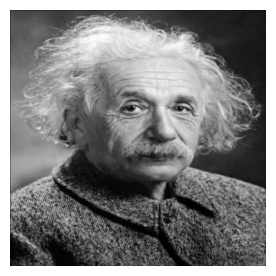

In [48]:
display_image_in_actual_size(g_level0)
display_image_in_actual_size(g_level1)
display_image_in_actual_size(g_level2)
display_image_in_actual_size(g_level3)

In [49]:
# Cell to compute LoG
gauss = cv.GaussianBlur(src_image_gray_2, (5, 5), 1.6, cv.BORDER_REPLICATE)
LoG = cv.Laplacian(gauss,cv.CV_32F)
plt.imshow(LoG, cmap='gray')
plt.title("Laplacian of Gaussian")
plt.show()

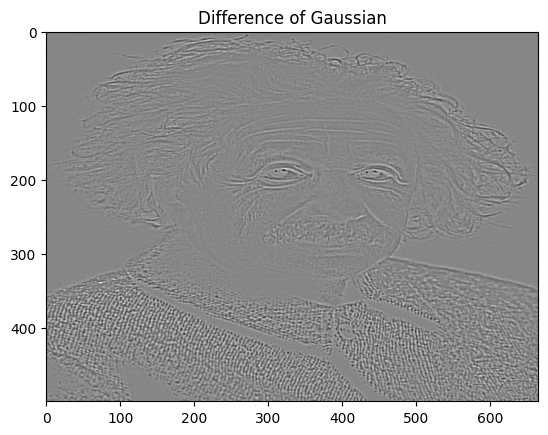

In [50]:
# Cell to compute DoG
low = cv.GaussianBlur(src_image_gray_2, (5, 5), 1.6, cv.BORDER_REPLICATE)
high = cv.GaussianBlur(src_image_gray_2, (5, 5), 2.4, cv.BORDER_REPLICATE)
DoG = high - low
plt.imshow(DoG, cmap='gray')
plt.title("Difference of Gaussian")
plt.show()

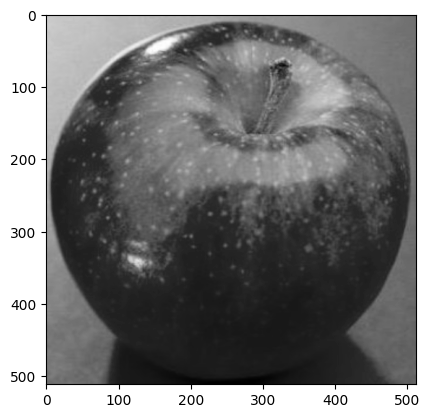

In [51]:
# Reading and reshaping apple and orange images
apple = cv.imread("apple.jpeg")
orange = cv.imread("orange.jpeg")

apple_gray = cv.cvtColor(apple, cv.COLOR_BGR2GRAY)
apple_gray = cv.resize(apple_gray, (512, 512))
orange_gray = cv.cvtColor(orange, cv.COLOR_BGR2GRAY)
orange_gray = cv.resize(orange_gray, (512, 512))
plt.imshow(apple_gray, cmap="gray")
plt.show()
plt.imshow(orange_gray, cmap="gray")

In [52]:
# Cell to compute Gaussian pyramid for apple
g_apple_level0 = apply_gaussian(apple_gray, gaussian)
g_apple_level1 = downsample(g_apple_level0)
g_apple_level2 = downsample(apply_gaussian(g_apple_level1, gaussian))
g_apple_level3 = downsample(apply_gaussian(g_apple_level2, gaussian))
apple_gauss_pyr = [g_apple_level0, g_apple_level1, g_apple_level2, g_apple_level3]

In [53]:
# Cell to compute Gaussian pyramid for orange

g_orange_level0 = apply_gaussian(orange_gray, gaussian)
g_orange_level1 = downsample(g_orange_level0)
g_orange_level2 = downsample(apply_gaussian(g_orange_level1, gaussian))
g_orange_level3 = downsample(apply_gaussian(g_orange_level2, gaussian))
orange_gauss_pyr = [g_orange_level0, g_orange_level1, g_orange_level2, g_orange_level3]

In [54]:
# Cell to compute Laplacian pyramid for apple

l_apple_level3 = g_apple_level3
l_apple_level2 = g_apple_level2 - apply_gaussian(upsample(g_apple_level3), gaussian)
l_apple_level1 = g_apple_level1 - apply_gaussian(upsample(g_apple_level2), gaussian) 
l_apple_level0 = g_apple_level0 - apply_gaussian(upsample(g_apple_level1), gaussian) 
apple_lap_pyr = [l_apple_level3, l_apple_level2, l_apple_level1, l_apple_level0]

In [55]:
# Cell to compute Laplacian pyramid for orange

l_orange_level3 = g_orange_level3
l_orange_level2 = g_orange_level2 - apply_gaussian(upsample(g_orange_level3), gaussian)
l_orange_level1 = g_orange_level1 - apply_gaussian(upsample(g_orange_level2), gaussian) 
l_orange_level0 = g_orange_level0 - apply_gaussian(upsample(g_orange_level1), gaussian) 
orange_lap_pyr = [l_orange_level3, l_orange_level2, l_orange_level1, l_orange_level0]

In [56]:
# Cell to create combined Laplacian pyramid
comb_level_0 = np.zeros(l_orange_level0.shape)
comb_level_1 = np.zeros(l_orange_level1.shape)
comb_level_2 = np.zeros(l_orange_level2.shape)
comb_level_3 = np.zeros(l_orange_level3.shape)
comb_pyr = []
for i in range(4):
    half = orange_lap_pyr[i].shape[1] // 2
    comb_pyr.append(np.hstack((apple_lap_pyr[i][ : , : half], orange_lap_pyr[i][ : , half :])))
comb_level_3 = comb_pyr[0]
comb_level_2 = comb_pyr[1]
comb_level_1 = comb_pyr[2]
comb_level_0 = comb_pyr[3]

In [57]:
# Cell to decode Laplacian to Gaussian
op_level_3 = comb_level_3
op_level_2 = apply_gaussian(upsample(op_level_3), gaussian) + comb_level_2
op_level_1 = apply_gaussian(upsample(op_level_2), gaussian) + comb_level_1
op_level_0 = apply_gaussian(upsample(op_level_1), gaussian) + comb_level_0


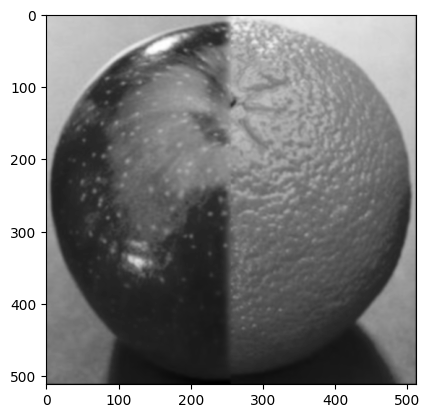

In [58]:
plt.imshow(op_level_0, cmap="gray")
plt.show()
